# Clase 14 - 4/10/2018
(x emilopez)

- Ejercicio 1 de la Guía Práctica Anova Factorial
- En ``Estadistica.Aplicada.2018/02_Disenio_Factorial_y_bloques/Practica_Anova_Factorial.pdf``

In [17]:
datos = read.table("/home/emiliano/EstadisticaAplicada/Estadistica.Aplicada.2018/02_disenio_factorial_y_bloques/datos/C6P3datos.txt", header=TRUE, sep='\t')
#head(datos)
attach(datos)
Telaf = as.factor(Tela)
Tempf = as.factor(Temp)

The following objects are masked from datos (pos = 5):

    Porc, Tela, Temp

The following objects are masked from datos (pos = 9):

    Porc, Tela, Temp

The following objects are masked from datos (pos = 11):

    Porc, Tela, Temp



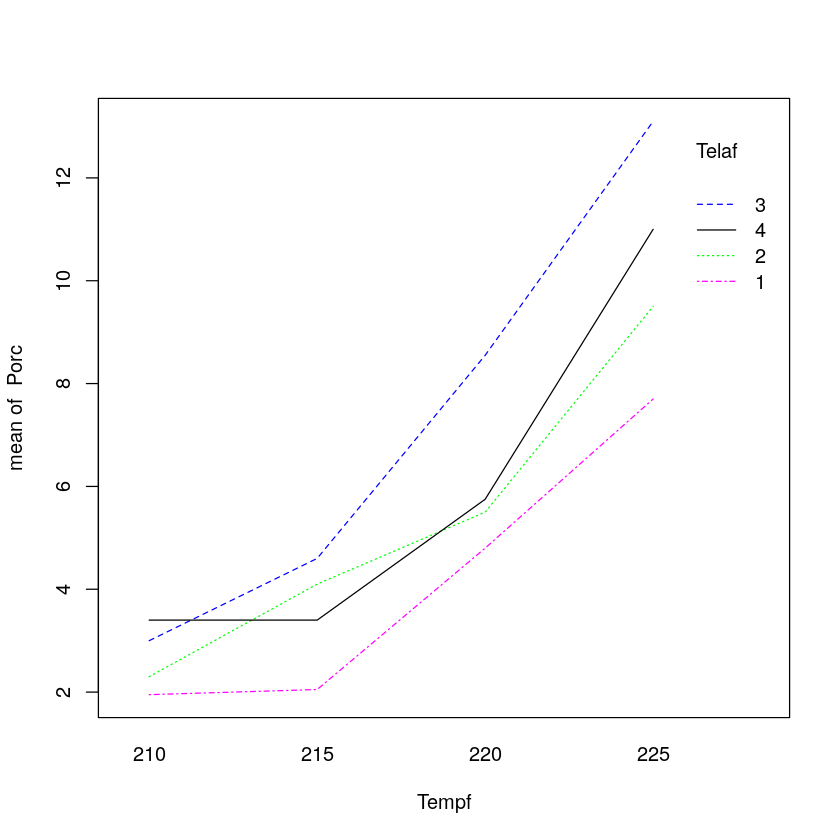

In [8]:
library(lattice)
interaction.plot(Tempf, Telaf, Porc, col=c('magenta', 'green', 'blue', 'black'))

In [9]:
modelo = aov(Porc~Telaf*Tempf)
summary(modelo)

            Df Sum Sq Mean Sq F value   Pr(>F)    
Telaf        3  41.88   13.96  279.18 5.05e-14 ***
Tempf        3 283.94   94.65 1892.91  < 2e-16 ***
Telaf:Tempf  9  15.86    1.76   35.24 7.09e-09 ***
Residuals   16   0.80    0.05                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


	Shapiro-Wilk normality test

data:  modelo$residuals
W = 0.93155, p-value = 0.04327


Warning message in anova.lm(lm(resp ~ group)):
“ANOVA F-tests on an essentially perfect fit are unreliable”

,Df,F value,Pr(>F)
group,15,5.265436e+28,1.258744e-226
,16,NA,NA


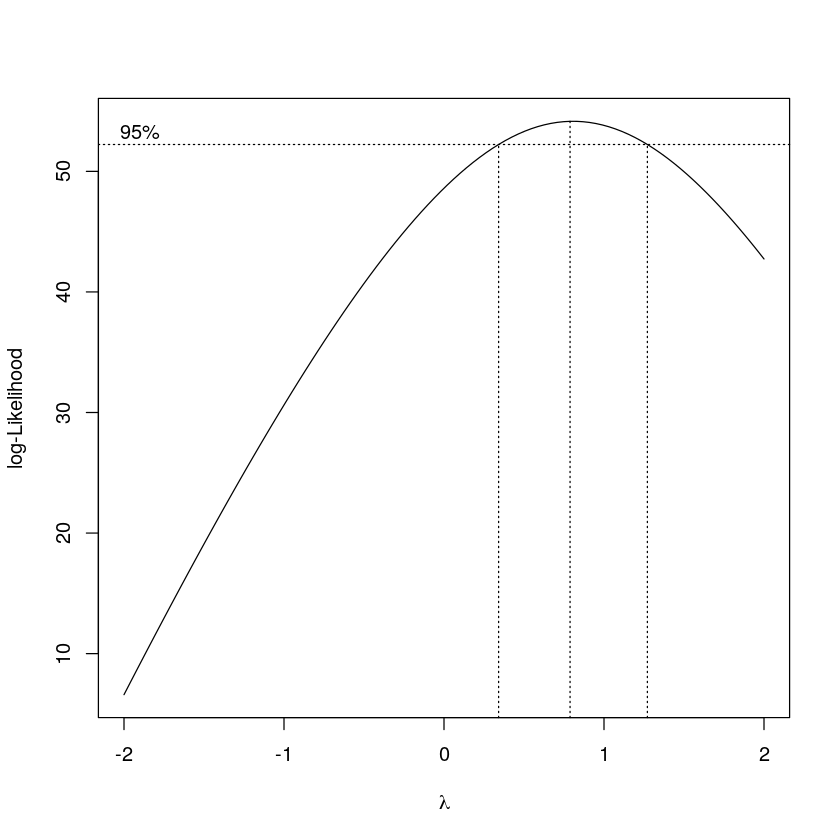

In [18]:
shapiro.test(modelo$residuals) # no puedo arreglar mucho teniendo precaucion pq no tengo tan asegurada la normalidad de los datos
library(car)
leveneTest(modelo) # no es confiable el test por los pocos datos
library(MASS)
boxcox(modelo) # me dice que no puedo mejorar mucho, no puedo hacer transformaciones
# entonces, o bien aceptamos como esta o vamos por otro camino porque ninguna transformacion que vos puedas 
# aplicar a estos datos para que anova me quede mejor condicionado

In [11]:
#f) aceptamos enotnces como esta, ahora vamos a hacer el analisis de tendencia

g = 4
contrasts(Tempf) = contr.poly(g, scores = c(210,215,220,225)) # porque no esta equispaciado
modelo = aov(Porc~Telaf*Tempf)
summary.lm(modelo) 
# vemos que el cubico es significativo, estamos testeando 15 cosas al mismo tiempo
# fijemos con que valor de alpha comparamos, con benferroni alpha_PC = 1 - (1- alpha0_que_quiero)^1/15
# alpha0_que_quiero = 0.05


Call:
aov(formula = Porc ~ Telaf * Tempf)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.3000 -0.1125  0.0000  0.1125  0.3000 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)     4.12500    0.07906  52.178  < 2e-16 ***
Telaf2          1.22500    0.11180  10.957 7.59e-09 ***
Telaf3          3.18750    0.11180  28.510 3.82e-15 ***
Telaf4          1.76250    0.11180  15.764 3.62e-11 ***
Tempf.L         4.47214    0.15811  28.284 4.33e-15 ***
Tempf.Q         1.40000    0.15811   8.854 1.45e-07 ***
Tempf.C        -0.55902    0.15811  -3.536  0.00275 ** 
Telaf2:Tempf.L  0.67082    0.22361   3.000  0.00848 ** 
Telaf3:Tempf.L  3.18640    0.22361  14.250 1.64e-10 ***
Telaf4:Tempf.L  1.15158    0.22361   5.150 9.68e-05 ***
Telaf2:Tempf.Q -0.30000    0.22361  -1.342  0.19845    
Telaf3:Tempf.Q  0.07500    0.22361   0.335  0.74167    
Telaf4:Tempf.Q  1.22500    0.22361   5.478 5.06e-05 ***
Telaf2:Tempf.C  1.22984    0.22361   5.500 4.85e-05 ***
Telaf3:T

In [19]:
alpha = 0.05
(alpha_PC = 1 - (1- alpha)^(1/15))
# 0.003413
# veo que no me puedo sacar de encima el cubico, los p-valores que son menores que el alpha_PC entonces
# son los que tengo que mirar en la tabla previa

[1] 0.003413713

In [20]:
datos$interaccion = factor(paste0(Telaf, Tempf))
attach(datos)

The following objects are masked from datos (pos = 3):

    Porc, Tela, Temp

The following objects are masked from datos (pos = 6):

    interaccion, Porc, Tela, Temp

The following objects are masked from datos (pos = 10):

    Porc, Tela, Temp

The following objects are masked from datos (pos = 12):

    Porc, Tela, Temp



In [21]:
# volvemos a ajustar
m2 = aov(Porc~interaccion)
summary(m2)

            Df Sum Sq Mean Sq F value Pr(>F)    
interaccion 15  341.7   22.78   455.6 <2e-16 ***
Residuals   16    0.8    0.05                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [15]:
# OJO, DEMORA 
source("/home/emiliano/EstadisticaAplicada/practica/mymultcomp.R")
minHSU(Porc, interaccion, alpha=0.05, 0.05, 16) # el mejor es el q encoje poco -> min
# este nos dice que el mejor es 1210 y solamente son equivalentes a 1215 y 2210

# probablemente si uno usa tukey probablemente encontraría alguno mas porque tiene menos potencia

[1] "WARNING: esta funcion considera que todos los ni son iguales"
[1] "1210"
[1] "1215"
[1] "2210"


[1] NA     "1210" "1215" "2210"

The 'lsmeans' package is being deprecated.
Users are encouraged to switch to 'emmeans'.
See help('transition') for more information, including how
to convert 'lsmeans' objects and scripts to work with 'emmeans'.


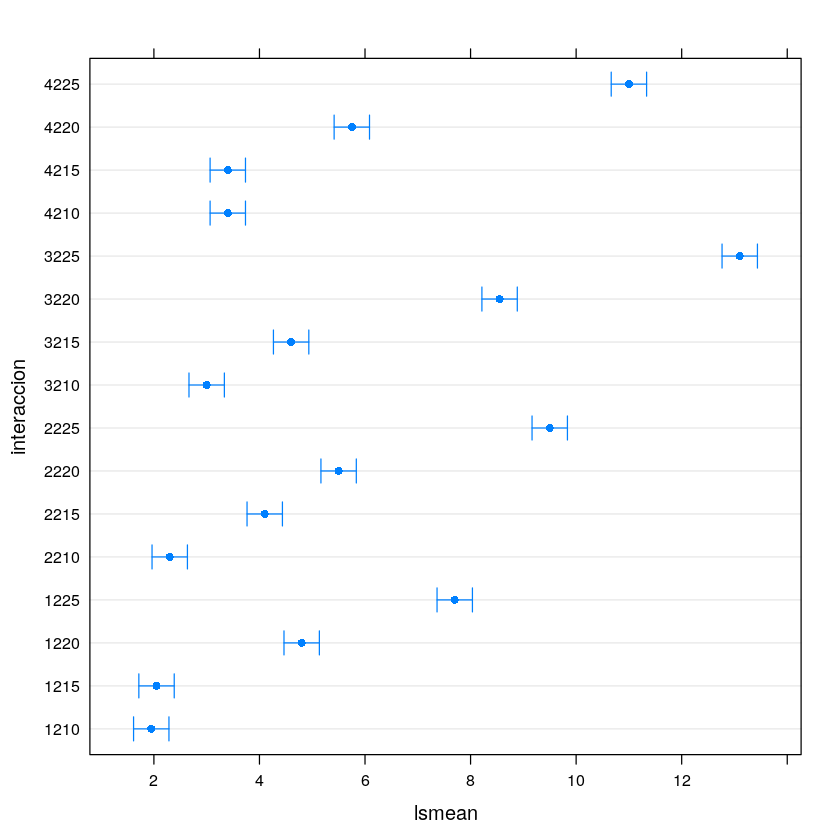

In [16]:
library(lsmeans)
medias = lsmeans(m2, ~interaccion)
plot(medias)